In [2]:
#Installation de Pycaret
!pip install pycaret

     |████████████████████████████████| 194kB 8.9MB/s eta 0:00:01
     |████████████████████████████████| 102kB 12.8MB/s 
     |████████████████████████████████| 3.0MB 59.4MB/s 
     |████████████████████████████████| 266kB 60.4MB/s 
     |████████████████████████████████| 7.0MB 30.0MB/s 
     |████████████████████████████████| 63.9MB 48kB/s 
     |████████████████████████████████| 1.6MB 49.5MB/s 
     |████████████████████████████████| 1.2MB 40.1MB/s 
     |████████████████████████████████| 389kB 58.3MB/s 
     |████████████████████████████████| 61kB 10.5MB/s 
     |████████████████████████████████| 133kB 63.9MB/s 
     |████████████████████████████████| 81kB 12.6MB/s 
     |████████████████████████████████| 2.1MB 49.7MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 6.2MB 51.4MB/s 
     |████████████████████████████████| 552kB 58.0MB/s 
     |████████████████████████████████| 235kB 56.0MB/s 
     |████████████████████████████████| 614

In [1]:
#Import des librairies
import pandas as pd
from pycaret.classification import *

In [2]:
#Import du dataset
hd= pd.read_csv('heart-disease-uci/heart_statlog_cleveland_hungary_final.csv')
hd.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [3]:
# format du dataset
print('hd lignes et colonnes : ', hd.shape)


hd lignes et colonnes :  (1190, 12)


In [4]:
#On va retirer pres de 100 observations que le modele ne connaitra pas
hd_model= hd.sample(frac=0.91, random_state=42).reset_index(drop=True)
hd_unseen= hd.drop(hd_model.index).reset_index(drop=True)
print('Dataset pour le model: ' + str(hd_model.shape))
print('Dataset non vu pour les futures predictions: ' + str(hd_unseen.shape))

Dataset pour le model: (1083, 12)
Dataset non vu pour les futures predictions: (107, 12)


In [ ]:
hd_unseen.to_csv('test.csv', index= False)

In [5]:
#Configuration du dataset pour pycaret
df = setup(data= hd_model, target='target', session_id=16, normalize=True, 
           ignore_low_variance=True,remove_multicollinearity = True, multicollinearity_threshold = 0.95,
            feature_selection=True, bin_numeric_features=['age'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,16
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(1083, 12)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [8]:
#Comparaison des models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.903700,0.950900,0.918300,0.905300,0.910900,0.806000
1,Extreme Gradient Boosting,0.894400,0.943200,0.913500,0.895300,0.903200,0.787100
2,Extra Trees Classifier,0.891900,0.955000,0.925700,0.881700,0.902300,0.781400
3,Gradient Boosting Classifier,0.889200,0.938400,0.908600,0.890500,0.897600,0.776700
4,Light Gradient Boosting Machine,0.885200,0.947800,0.910800,0.881900,0.895000,0.768300
5,Random Forest Classifier,0.860100,0.934600,0.851800,0.886200,0.866800,0.719400
6,Ada Boost Classifier,0.848300,0.919100,0.864200,0.857600,0.859300,0.694700
7,Ridge Classifier,0.837900,0.000000,0.869300,0.836200,0.851400,0.673100
8,Linear Discriminant Analysis,0.837900,0.909900,0.869300,0.836200,0.851400,0.673100
9,K Neighbors Classifier,0.837800,0.908600,0.864000,0.840100,0.850100,0.673200


In [ ]:
# On observe que le modele Extreme Gradient Boosting detient 5 des meilleurs metrics. Nous allons ici comparer 3 modeles:
# Catboost
# Extra Trees Classifier
# Random Forest


In [9]:
# CREATION DES MODELES
# CatBoost
cat= create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9211,0.9833,0.9512,0.9070,0.9286,0.8404
1,0.8816,0.9192,0.9512,0.8478,0.8966,0.7592
2,0.8553,0.9324,0.9024,0.8409,0.8706,0.7069
3,0.9342,0.9575,0.9512,0.9286,0.9398,0.8673
4,0.9211,0.9401,0.9268,0.9268,0.9268,0.8411
5,0.9211,0.9750,0.9500,0.9048,0.9268,0.8412
6,0.8816,0.9194,0.8500,0.9189,0.8831,0.7635
7,0.9211,0.9597,0.9250,0.9250,0.9250,0.8417
8,0.9467,0.9821,0.9000,1.0000,0.9474,0.8936
9,0.8533,0.9407,0.8750,0.8537,0.8642,0.7048


In [ ]:
print(cat)

In [10]:
# TUNER LES MODELES
tuned_cat= tune_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9079,0.9770,0.9268,0.9048,0.9157,0.8142
1,0.8684,0.9303,0.9268,0.8444,0.8837,0.7330
2,0.8553,0.9261,0.9268,0.8261,0.8736,0.7056
3,0.9211,0.9596,0.9268,0.9268,0.9268,0.8411
4,0.9211,0.9477,0.9268,0.9268,0.9268,0.8411
5,0.9211,0.9764,0.9500,0.9048,0.9268,0.8412
6,0.8684,0.9062,0.8500,0.8947,0.8718,0.7368
7,0.9079,0.9625,0.9000,0.9231,0.9114,0.8155
8,0.9067,0.9786,0.9000,0.9231,0.9114,0.8128
9,0.8933,0.9457,0.9000,0.9000,0.9000,0.7857


In [ ]:
#On constate que le cat est meilleur

In [11]:
#Extra Trees Classifier
etc= create_model('et')
print(etc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9211,0.9829,0.9756,0.8889,0.9302,0.8398
1,0.8421,0.9387,0.9512,0.7959,0.8667,0.6768
2,0.8026,0.9073,0.8780,0.7826,0.8276,0.5986
3,0.9474,0.9767,0.9756,0.9302,0.9524,0.8936
4,0.9079,0.9533,0.9268,0.9048,0.9157,0.8142
5,0.8947,0.9649,0.9250,0.8810,0.9024,0.7883
6,0.8553,0.9292,0.9000,0.8372,0.8675,0.7085
7,0.9079,0.9653,0.9000,0.9231,0.9114,0.8155
8,0.9467,0.9868,0.9250,0.9737,0.9487,0.8932
9,0.8933,0.9450,0.9000,0.9000,0.9000,0.7857


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=16, verbose=0,
                     warm_start=False)


In [12]:
tuned_etc = tune_model('et')
print(tuned_etc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8947,0.9812,0.9512,0.8667,0.9070,0.7864
1,0.8421,0.9310,0.9268,0.8085,0.8636,0.6782
2,0.8421,0.9157,0.9268,0.8085,0.8636,0.6782
3,0.9474,0.9603,0.9756,0.9302,0.9524,0.8936
4,0.8816,0.9456,0.9268,0.8636,0.8941,0.7602
5,0.9079,0.9653,0.9500,0.8837,0.9157,0.8145
6,0.9211,0.9361,0.9500,0.9048,0.9268,0.8412
7,0.9211,0.9653,0.9250,0.9250,0.9250,0.8417
8,0.9333,0.9850,0.9500,0.9268,0.9383,0.8658
9,0.8933,0.9564,0.9000,0.9000,0.9000,0.7857


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=60, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=105,
                     n_jobs=None, oob_score=False, random_state=16, verbose=0,
                     warm_start=False)


In [ ]:
#tuned etc< etc

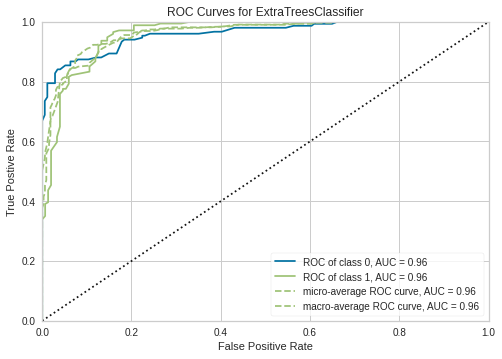

In [13]:
plot_model(etc, plot='auc')

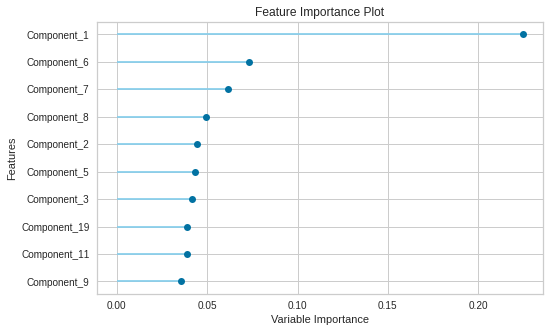

In [14]:
plot_model(etc, plot= 'feature')

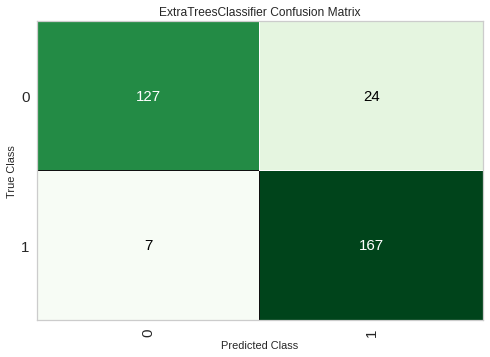

In [15]:
plot_model(etc, plot='confusion_matrix')

In [23]:
#Extreme gradient boost
xgb= create_model('xgboost')
print(xgb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9474,0.9882,0.9756,0.9302,0.9524,0.8936
1,0.8553,0.9073,0.9268,0.8261,0.8736,0.7056
2,0.8289,0.9185,0.9024,0.8043,0.8506,0.6521
3,0.8816,0.9443,0.8780,0.9000,0.8889,0.7622
4,0.9211,0.9275,0.9268,0.9268,0.9268,0.8411
5,0.9342,0.9764,0.9000,0.9730,0.9351,0.8686
6,0.8816,0.9111,0.9000,0.8780,0.8889,0.7622
7,0.9211,0.9507,0.9500,0.9048,0.9268,0.8412
8,0.9200,0.9707,0.8750,0.9722,0.9211,0.8404
9,0.8533,0.9379,0.9000,0.8372,0.8675,0.7038


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=16,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)


In [24]:
tuned_xgb= tune_model('xgboost')
print(tuned_xgb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9342,0.9833,0.9512,0.9286,0.9398,0.8673
1,0.8684,0.9122,0.9268,0.8444,0.8837,0.7330
2,0.8421,0.9073,0.9024,0.8222,0.8605,0.6796
3,0.9211,0.9498,0.9268,0.9268,0.9268,0.8411
4,0.9079,0.9289,0.9268,0.9048,0.9157,0.8142
5,0.9211,0.9528,0.9500,0.9048,0.9268,0.8412
6,0.8553,0.9146,0.8500,0.8718,0.8608,0.7101
7,0.9079,0.9521,0.9250,0.9024,0.9136,0.8150
8,0.9067,0.9650,0.8750,0.9459,0.9091,0.8135
9,0.9067,0.9250,0.9500,0.8837,0.9157,0.8115


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.29, max_delta_step=0, max_depth=80,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=16,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)


In [6]:
#RANDOM FOREST
rf= create_model('rf')
print(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8421,0.9334,0.8537,0.8537,0.8537,0.6822
1,0.8158,0.9150,0.8780,0.8000,0.8372,0.6261
2,0.8816,0.9341,0.9268,0.8636,0.8941,0.7602
3,0.8421,0.9453,0.7561,0.9394,0.8378,0.6875
4,0.8947,0.9237,0.8780,0.9231,0.9000,0.7890
5,0.8816,0.9382,0.8500,0.9189,0.8831,0.7635
6,0.8816,0.9132,0.9000,0.8780,0.8889,0.7622
7,0.8816,0.9653,0.8500,0.9189,0.8831,0.7635
8,0.8667,0.9668,0.8000,0.9412,0.8649,0.7350
9,0.8133,0.9114,0.8250,0.8250,0.8250,0.6250


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=16, verbose=0,
                       warm_start=False)


In [7]:
tuned_rf = tune_model('rf')
print(tuned_rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9211,0.9889,0.9512,0.9070,0.9286,0.8404
1,0.8553,0.9247,0.9512,0.8125,0.8764,0.7044
2,0.8553,0.9268,0.9268,0.8261,0.8736,0.7056
3,0.9605,0.9672,0.9756,0.9524,0.9639,0.9204
4,0.8947,0.9366,0.9024,0.9024,0.9024,0.7882
5,0.9079,0.9812,0.8750,0.9459,0.9091,0.8160
6,0.8684,0.9229,0.9000,0.8571,0.8780,0.7354
7,0.9211,0.9590,0.9500,0.9048,0.9268,0.8412
8,0.9600,0.9807,0.9250,1.0000,0.9610,0.9201
9,0.8667,0.9421,0.9000,0.8571,0.8780,0.7312


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=16, verbose=0,
                       warm_start=False)


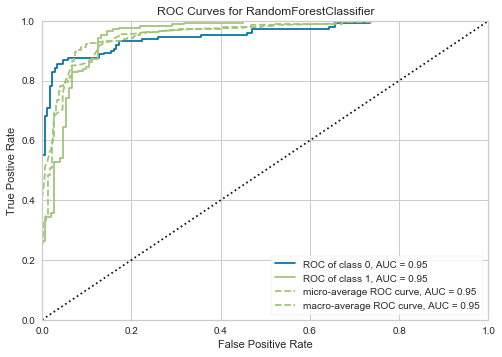

In [8]:
plot_model(tuned_rf, plot='auc')

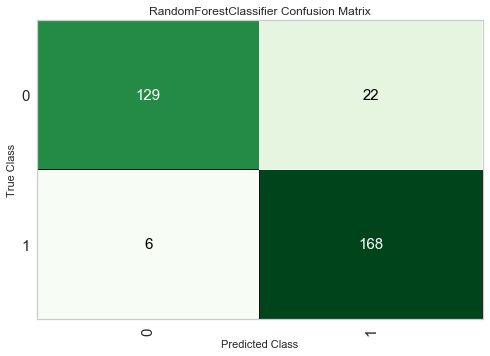

In [9]:
plot_model(tuned_rf, plot='confusion_matrix')

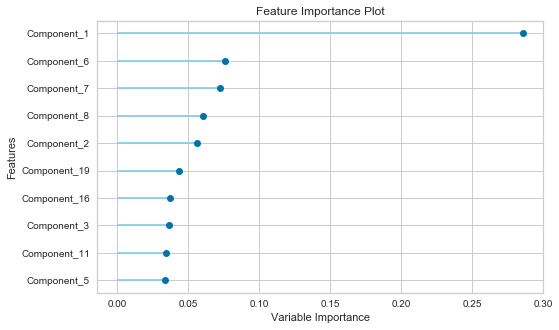

In [10]:
plot_model(tuned_rf, plot='feature')

In [20]:
#PREDICTIONS
predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.9138,0.953,0.9655,0.8842,0.9231,0.8256


,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,Component_11,Component_12,Component_13,Component_14,Component_15,Component_16,Component_17,Component_18,Component_19,Component_20,Component_21,target,Label,Score
0,1.172069,0.048744,-1.501288,-1.205589,-0.256944,-0.011230,0.391589,-0.236773,0.860299,0.183352,-0.365964,0.766157,-0.578842,0.123613,-0.158953,0.019125,0.099398,-0.071347,-0.220760,-0.102597,-0.065568,0,0,0.1173
1,-0.927610,0.204050,0.323402,0.205925,0.486704,0.507639,-0.159771,0.333619,0.480600,-0.483386,0.540200,-0.490691,0.248820,-0.257599,0.146441,-0.368661,0.718153,0.241692,0.036709,0.023943,-0.130641,1,1,0.6753
2,2.647001,4.910768,7.235573,-0.671495,0.172619,-0.517575,0.969915,0.367859,0.497083,-0.126148,-0.247308,0.345707,-0.338898,0.076179,-0.385141,-0.053090,-0.080646,-0.583849,-0.348066,0.033105,-0.026000,1,1,0.5428
3,-1.253944,1.702803,0.339871,-0.990124,0.479628,-0.494719,-0.610113,0.198414,0.166096,0.143992,1.209173,0.523059,0.489961,0.971589,-0.033942,-0.051542,0.052115,-0.085143,0.739740,-0.080258,0.010548,1,1,0.9199
4,-1.001575,0.835223,0.799887,0.282537,-0.541745,0.097709,0.078095,-0.178145,-0.382409,0.643172,-0.017933,-0.462528,-0.169529,-0.597812,-0.463399,-0.022799,-0.015474,-0.050906,0.061405,-0.053993,-0.026319,1,1,0.9687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,-1.029428,-0.604586,0.108946,0.409204,-0.668266,-0.122803,0.977437,-0.356604,0.185966,-0.555920,-0.206365,0.010053,0.691899,0.495336,-0.311059,-0.044673,-0.018878,-0.140685,-0.158599,-0.143939,-0.016758,1,1,0.6368
321,-0.059778,-0.046366,1.022178,-0.582879,-0.571453,0.266098,0.967351,-0.210312,0.412801,-0.506339,-0.195139,-0.219743,0.161814,0.196140,0.296584,-0.249892,-0.551769,0.577930,0.006649,-0.076852,-0.115985,0,1,0.6480
322,0.317718,0.436680,-1.064508,0.066382,0.497356,-0.675901,-0.189714,0.261005,0.698606,0.487254,0.347484,0.313805,0.565649,-0.394650,0.197571,-0.088336,0.032576,0.143819,-0.214873,1.275653,0.360619,0,0,0.2085
323,2.179551,0.259475,-0.170154,-1.000916,0.624610,0.023510,-0.170264,0.501468,0.175943,-0.220546,1.120391,-0.106745,0.075985,0.000719,-0.113317,-0.169978,-0.165952,-0.357238,-0.013368,1.127426,0.113809,0,0,0.0888


In [21]:
predict_model(cat)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.9077,0.9531,0.9598,0.8789,0.9176,0.8131


,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,Component_11,Component_12,Component_13,Component_14,Component_15,Component_16,Component_17,Component_18,Component_19,Component_20,Component_21,target,Label,Score
0,1.172069,0.048744,-1.501288,-1.205589,-0.256944,-0.011230,0.391589,-0.236773,0.860299,0.183352,-0.365964,0.766157,-0.578842,0.123613,-0.158953,0.019125,0.099398,-0.071347,-0.220760,-0.102597,-0.065568,0,0,0.0390
1,-0.927610,0.204050,0.323402,0.205925,0.486704,0.507639,-0.159771,0.333619,0.480600,-0.483386,0.540200,-0.490691,0.248820,-0.257599,0.146441,-0.368661,0.718153,0.241692,0.036709,0.023943,-0.130641,1,1,0.8688
2,2.647001,4.910768,7.235573,-0.671495,0.172619,-0.517575,0.969915,0.367859,0.497083,-0.126148,-0.247308,0.345707,-0.338898,0.076179,-0.385141,-0.053090,-0.080646,-0.583849,-0.348066,0.033105,-0.026000,1,0,0.3048
3,-1.253944,1.702803,0.339871,-0.990124,0.479628,-0.494719,-0.610113,0.198414,0.166096,0.143992,1.209173,0.523059,0.489961,0.971589,-0.033942,-0.051542,0.052115,-0.085143,0.739740,-0.080258,0.010548,1,1,0.9944
4,-1.001575,0.835223,0.799887,0.282537,-0.541745,0.097709,0.078095,-0.178145,-0.382409,0.643172,-0.017933,-0.462528,-0.169529,-0.597812,-0.463399,-0.022799,-0.015474,-0.050906,0.061405,-0.053993,-0.026319,1,1,0.9893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,-1.029428,-0.604586,0.108946,0.409204,-0.668266,-0.122803,0.977437,-0.356604,0.185966,-0.555920,-0.206365,0.010053,0.691899,0.495336,-0.311059,-0.044673,-0.018878,-0.140685,-0.158599,-0.143939,-0.016758,1,1,0.8293
321,-0.059778,-0.046366,1.022178,-0.582879,-0.571453,0.266098,0.967351,-0.210312,0.412801,-0.506339,-0.195139,-0.219743,0.161814,0.196140,0.296584,-0.249892,-0.551769,0.577930,0.006649,-0.076852,-0.115985,0,1,0.5788
322,0.317718,0.436680,-1.064508,0.066382,0.497356,-0.675901,-0.189714,0.261005,0.698606,0.487254,0.347484,0.313805,0.565649,-0.394650,0.197571,-0.088336,0.032576,0.143819,-0.214873,1.275653,0.360619,0,0,0.0293
323,2.179551,0.259475,-0.170154,-1.000916,0.624610,0.023510,-0.170264,0.501468,0.175943,-0.220546,1.120391,-0.106745,0.075985,0.000719,-0.113317,-0.169978,-0.165952,-0.357238,-0.013368,1.127426,0.113809,0,0,0.0194


In [22]:
predict_model(etc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.9046,0.9606,0.9598,0.8743,0.9151,0.8068


,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,Component_11,Component_12,Component_13,Component_14,Component_15,Component_16,Component_17,Component_18,Component_19,Component_20,Component_21,target,Label,Score
0,1.172069,0.048744,-1.501288,-1.205589,-0.256944,-0.011230,0.391589,-0.236773,0.860299,0.183352,-0.365964,0.766157,-0.578842,0.123613,-0.158953,0.019125,0.099398,-0.071347,-0.220760,-0.102597,-0.065568,0,0,0.00
1,-0.927610,0.204050,0.323402,0.205925,0.486704,0.507639,-0.159771,0.333619,0.480600,-0.483386,0.540200,-0.490691,0.248820,-0.257599,0.146441,-0.368661,0.718153,0.241692,0.036709,0.023943,-0.130641,1,1,0.53
2,2.647001,4.910768,7.235573,-0.671495,0.172619,-0.517575,0.969915,0.367859,0.497083,-0.126148,-0.247308,0.345707,-0.338898,0.076179,-0.385141,-0.053090,-0.080646,-0.583849,-0.348066,0.033105,-0.026000,1,0,0.41
3,-1.253944,1.702803,0.339871,-0.990124,0.479628,-0.494719,-0.610113,0.198414,0.166096,0.143992,1.209173,0.523059,0.489961,0.971589,-0.033942,-0.051542,0.052115,-0.085143,0.739740,-0.080258,0.010548,1,1,0.82
4,-1.001575,0.835223,0.799887,0.282537,-0.541745,0.097709,0.078095,-0.178145,-0.382409,0.643172,-0.017933,-0.462528,-0.169529,-0.597812,-0.463399,-0.022799,-0.015474,-0.050906,0.061405,-0.053993,-0.026319,1,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,-1.029428,-0.604586,0.108946,0.409204,-0.668266,-0.122803,0.977437,-0.356604,0.185966,-0.555920,-0.206365,0.010053,0.691899,0.495336,-0.311059,-0.044673,-0.018878,-0.140685,-0.158599,-0.143939,-0.016758,1,0,0.40
321,-0.059778,-0.046366,1.022178,-0.582879,-0.571453,0.266098,0.967351,-0.210312,0.412801,-0.506339,-0.195139,-0.219743,0.161814,0.196140,0.296584,-0.249892,-0.551769,0.577930,0.006649,-0.076852,-0.115985,0,1,0.57
322,0.317718,0.436680,-1.064508,0.066382,0.497356,-0.675901,-0.189714,0.261005,0.698606,0.487254,0.347484,0.313805,0.565649,-0.394650,0.197571,-0.088336,0.032576,0.143819,-0.214873,1.275653,0.360619,0,0,0.45
323,2.179551,0.259475,-0.170154,-1.000916,0.624610,0.023510,-0.170264,0.501468,0.175943,-0.220546,1.120391,-0.106745,0.075985,0.000719,-0.113317,-0.169978,-0.165952,-0.357238,-0.013368,1.127426,0.113809,0,0,0.23


In [25]:
predict_model(tuned_xgb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.9046,0.9329,0.9655,0.8705,0.9155,0.8067


,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,Component_11,Component_12,Component_13,Component_14,Component_15,Component_16,Component_17,Component_18,Component_19,Component_20,Component_21,target,Label,Score
0,1.172069,0.048744,-1.501288,-1.205589,-0.256944,-0.011230,0.391589,-0.236773,0.860299,0.183352,-0.365964,0.766157,-0.578842,0.123613,-0.158953,0.019125,0.099398,-0.071347,-0.220760,-0.102597,-0.065568,0,0,0.0073
1,-0.927610,0.204050,0.323402,0.205925,0.486704,0.507639,-0.159771,0.333619,0.480600,-0.483386,0.540200,-0.490691,0.248820,-0.257599,0.146441,-0.368661,0.718153,0.241692,0.036709,0.023943,-0.130641,1,1,0.6640
2,2.647001,4.910768,7.235573,-0.671495,0.172619,-0.517575,0.969915,0.367859,0.497083,-0.126148,-0.247308,0.345707,-0.338898,0.076179,-0.385141,-0.053090,-0.080646,-0.583849,-0.348066,0.033105,-0.026000,1,1,0.7620
3,-1.253944,1.702803,0.339871,-0.990124,0.479628,-0.494719,-0.610113,0.198414,0.166096,0.143992,1.209173,0.523059,0.489961,0.971589,-0.033942,-0.051542,0.052115,-0.085143,0.739740,-0.080258,0.010548,1,1,0.9977
4,-1.001575,0.835223,0.799887,0.282537,-0.541745,0.097709,0.078095,-0.178145,-0.382409,0.643172,-0.017933,-0.462528,-0.169529,-0.597812,-0.463399,-0.022799,-0.015474,-0.050906,0.061405,-0.053993,-0.026319,1,1,0.9983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,-1.029428,-0.604586,0.108946,0.409204,-0.668266,-0.122803,0.977437,-0.356604,0.185966,-0.555920,-0.206365,0.010053,0.691899,0.495336,-0.311059,-0.044673,-0.018878,-0.140685,-0.158599,-0.143939,-0.016758,1,1,0.7806
321,-0.059778,-0.046366,1.022178,-0.582879,-0.571453,0.266098,0.967351,-0.210312,0.412801,-0.506339,-0.195139,-0.219743,0.161814,0.196140,0.296584,-0.249892,-0.551769,0.577930,0.006649,-0.076852,-0.115985,0,1,0.5394
322,0.317718,0.436680,-1.064508,0.066382,0.497356,-0.675901,-0.189714,0.261005,0.698606,0.487254,0.347484,0.313805,0.565649,-0.394650,0.197571,-0.088336,0.032576,0.143819,-0.214873,1.275653,0.360619,0,0,0.0167
323,2.179551,0.259475,-0.170154,-1.000916,0.624610,0.023510,-0.170264,0.501468,0.175943,-0.220546,1.120391,-0.106745,0.075985,0.000719,-0.113317,-0.169978,-0.165952,-0.357238,-0.013368,1.127426,0.113809,0,0,0.0049


In [ ]:
final_rf= finalize_model(tuned_rf)

In [27]:
predict_model(final_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.9969,1.0,1.0,0.9943,0.9971,0.9938


,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,Component_11,Component_12,Component_13,Component_14,Component_15,Component_16,Component_17,Component_18,Component_19,Component_20,Component_21,target,Label,Score
0,1.172069,0.048744,-1.501288,-1.205589,-0.256944,-0.011230,0.391589,-0.236773,0.860299,0.183352,-0.365964,0.766157,-0.578842,0.123613,-0.158953,0.019125,0.099398,-0.071347,-0.220760,-0.102597,-0.065568,0,0,0.0117
1,-0.927610,0.204050,0.323402,0.205925,0.486704,0.507639,-0.159771,0.333619,0.480600,-0.483386,0.540200,-0.490691,0.248820,-0.257599,0.146441,-0.368661,0.718153,0.241692,0.036709,0.023943,-0.130641,1,1,0.8925
2,2.647001,4.910768,7.235573,-0.671495,0.172619,-0.517575,0.969915,0.367859,0.497083,-0.126148,-0.247308,0.345707,-0.338898,0.076179,-0.385141,-0.053090,-0.080646,-0.583849,-0.348066,0.033105,-0.026000,1,1,0.8598
3,-1.253944,1.702803,0.339871,-0.990124,0.479628,-0.494719,-0.610113,0.198414,0.166096,0.143992,1.209173,0.523059,0.489961,0.971589,-0.033942,-0.051542,0.052115,-0.085143,0.739740,-0.080258,0.010548,1,1,0.9553
4,-1.001575,0.835223,0.799887,0.282537,-0.541745,0.097709,0.078095,-0.178145,-0.382409,0.643172,-0.017933,-0.462528,-0.169529,-0.597812,-0.463399,-0.022799,-0.015474,-0.050906,0.061405,-0.053993,-0.026319,1,1,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,-1.029428,-0.604586,0.108946,0.409204,-0.668266,-0.122803,0.977437,-0.356604,0.185966,-0.555920,-0.206365,0.010053,0.691899,0.495336,-0.311059,-0.044673,-0.018878,-0.140685,-0.158599,-0.143939,-0.016758,1,1,0.8721
321,-0.059778,-0.046366,1.022178,-0.582879,-0.571453,0.266098,0.967351,-0.210312,0.412801,-0.506339,-0.195139,-0.219743,0.161814,0.196140,0.296584,-0.249892,-0.551769,0.577930,0.006649,-0.076852,-0.115985,0,0,0.1620
322,0.317718,0.436680,-1.064508,0.066382,0.497356,-0.675901,-0.189714,0.261005,0.698606,0.487254,0.347484,0.313805,0.565649,-0.394650,0.197571,-0.088336,0.032576,0.143819,-0.214873,1.275653,0.360619,0,0,0.0788
323,2.179551,0.259475,-0.170154,-1.000916,0.624610,0.023510,-0.170264,0.501468,0.175943,-0.220546,1.120391,-0.106745,0.075985,0.000719,-0.113317,-0.169978,-0.165952,-0.357238,-0.013368,1.127426,0.113809,0,0,0.0643


In [28]:
predict_model(final_rf, data= hd_unseen)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,Label,Score
0,69,1,1,160,234,1,2,131,0,0.1,2,0,0,0.1593
1,45,0,4,138,236,0,2,152,1,0.2,2,0,0,0.0615
2,50,0,2,120,244,0,0,162,0,1.1,1,0,0,0.0083
3,59,1,1,160,273,0,2,125,0,0.0,1,1,1,0.6054
4,50,0,4,110,254,0,2,159,0,0.0,1,0,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,45,1,1,110,264,0,0,132,0,1.2,2,1,1,0.8511
103,68,1,4,144,193,1,0,141,0,3.4,2,1,1,0.9647
104,57,1,4,130,131,0,0,115,1,1.2,2,1,1,0.9561
105,57,0,2,130,236,0,2,174,0,0.0,2,1,1,0.6647


In [29]:
save_model(final_rf, 'model_rf')

Transformation Pipeline and Model Succesfully Saved
